# Part 1 - EDA AND DATA PREPARATION


## READING IN THE DATA

In [47]:
import datacleaning as dc
import eda_visualisations as ev
import pandas as pd
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# reading in the data, as well as creating a datetime using the library datacleaning
filename = 'household_power_consumption.txt'
data = dc.read_csv(filename)
display(data.head(3))
print("Number of rows: {} and columns: {}".format(data.shape[0], data.shape[1]))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0


Number of rows: 2075259 and columns: 7


In [40]:
# changing column names to more appropriate python syntax
columns = ['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 
           'active_energy_kitchen', 'active_energy_laundry', 'active_energy_control']
data = dc.col_names(data, columns)
display(data.head(3))
print(data.columns)

,global_active_power,global_reactive_power,voltage,global_intensity,active_energy_kitchen,active_energy_laundry,active_energy_control
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0


Index(['global_active_power', 'global_reactive_power', 'voltage',
       'global_intensity', 'active_energy_kitchen', 'active_energy_laundry',
       'active_energy_control'],
      dtype='object')


### Interpreting the dataset

Active and reactive energy are technical deatails of alternative current
* Active energy is the real power consumed by the household
* Reactive energy is the unused power in the lines

Dataset also includes some division of the active power in the main circuit
* active_energy_kitchen 
* active_energy_laundry
* active_energy_control - active energy for climate control systems

NB: global active and reactive power are in kilowatts, whereas the local measurements are in watt-hours

$$ Wh = (kW * 1000)/60 $$

So, it would be possible to calculate the energy that is missing from this total as the following

$$ remainder = (global__active_power*1000 /60) - (active_energy_kitchen + active_energy_laundry + active_energy_control) $$

### Checking for abnormalities in dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
global_active_power      object
global_reactive_power    object
voltage                  object
global_intensity         object
active_energy_kitchen    object
active_energy_laundry    object
active_energy_control    float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [6]:
# checking for null values, and getting the total sum
display(data.isna().sum())

global_active_power          0
global_reactive_power        0
voltage                      0
global_intensity             0
active_energy_kitchen        0
active_energy_laundry        0
active_energy_control    25979
dtype: int64

In [44]:
# removing null values
data = dc.drop_na(data)
display(data.isna().sum())

global_active_power      0
global_reactive_power    0
voltage                  0
global_intensity         0
active_energy_kitchen    0
active_energy_laundry    0
active_energy_control    0
dtype: int64

# Exploratory Data Analysis

### Inspecting ALL variables

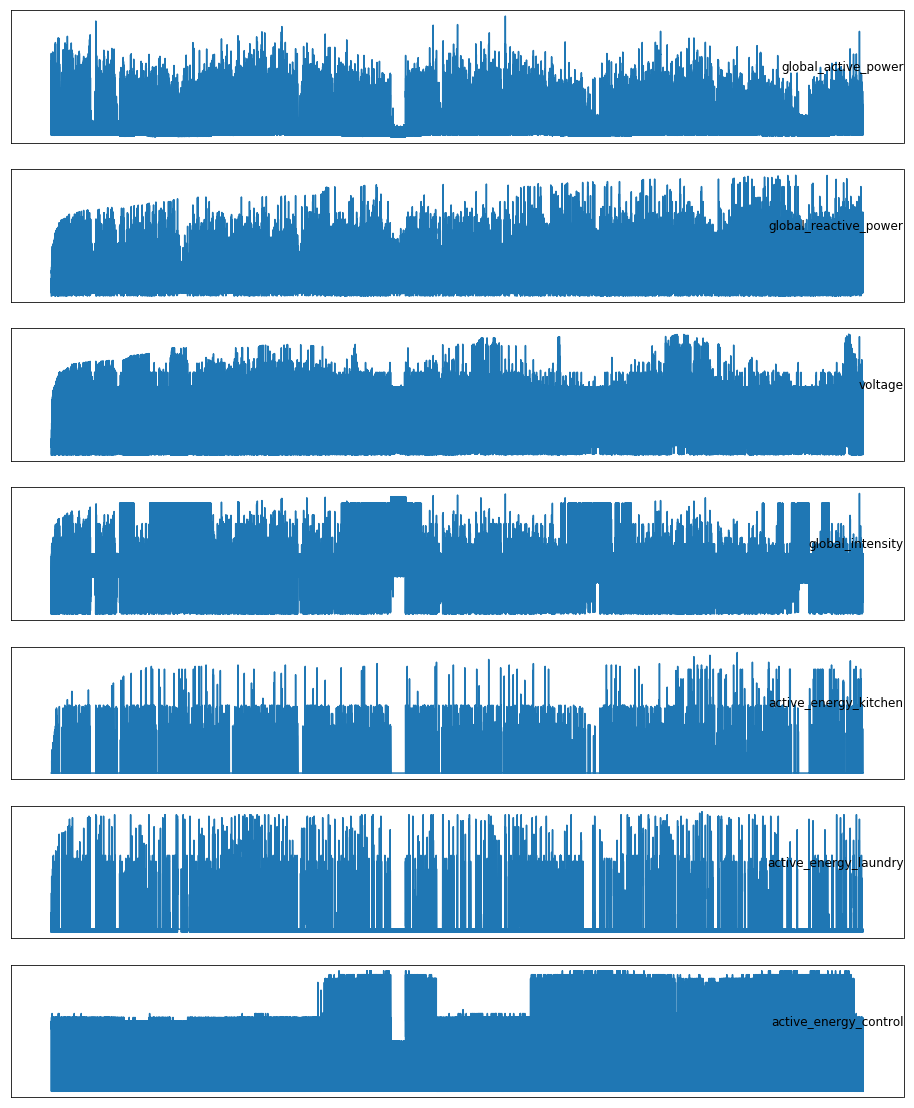

In [48]:
# library for visualisations is eda_visualisations

# creating a plot of all data using my own function
ev.all_variables(data)

# displaying the visualisation
plt.show();

### Some notes on the plots
* Some seasonality can be seen in the first four plots
* Slight decrease on average in power, voltage, intensity over the four years
* Less seasonality in the locational energy demands, data is quite constant over time and moves in steps
* Some seasonality in active_energy_other, but seems to also be decreasing over time


### *For now, it looks quite noisy, could potentially separate the data by years*

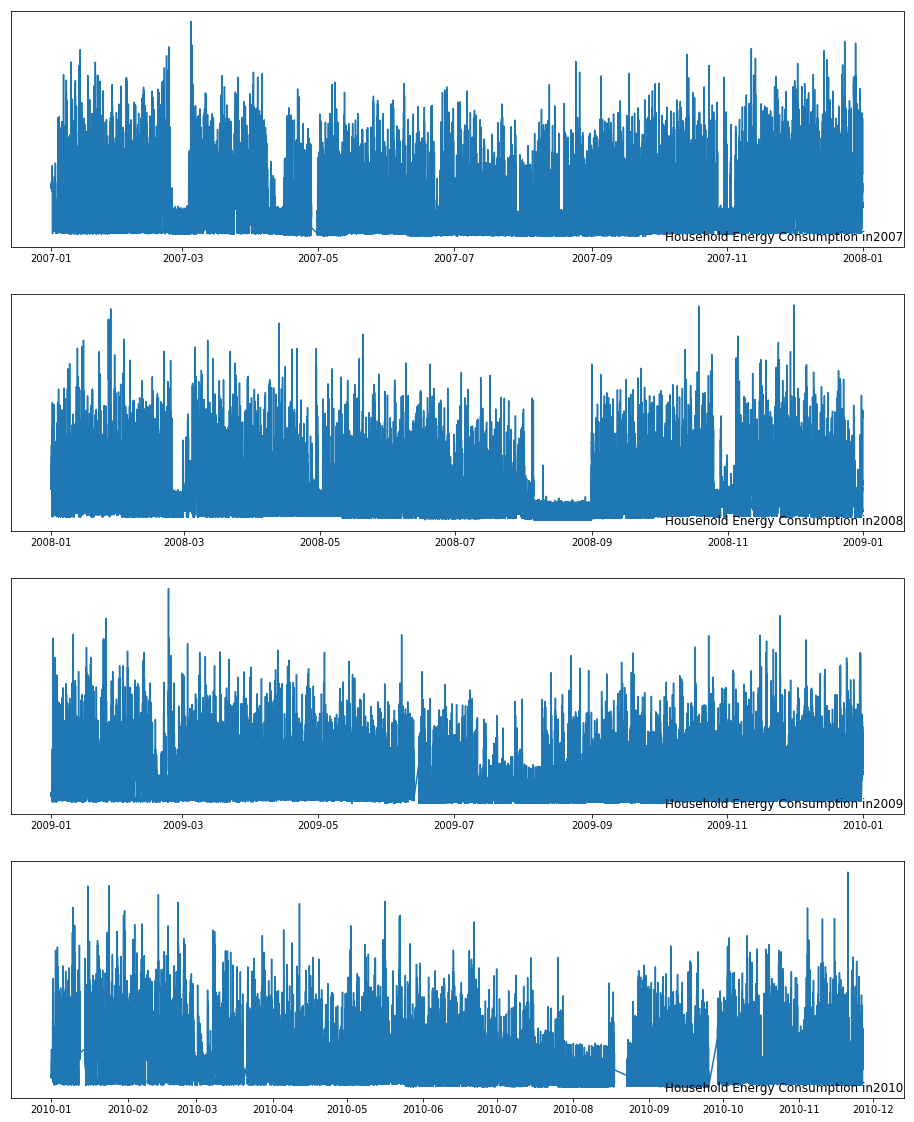

In [49]:
# it may be easier to see the visualisations which are separated by years
years = ['2007', '2008', '2009', '2010']

# creating the visualisations with a function 
ev.power_consumption_by_year(data, years)

# displaying the visualisation
plt.show();

Seems to be seasonality in this plot year-on-year
* Higher consumption in winter/colder periods
* As years have progressed, the effect of seasonality is 
* Missing data in first, third and fourth years

### *May be worth looking at consumption per month*

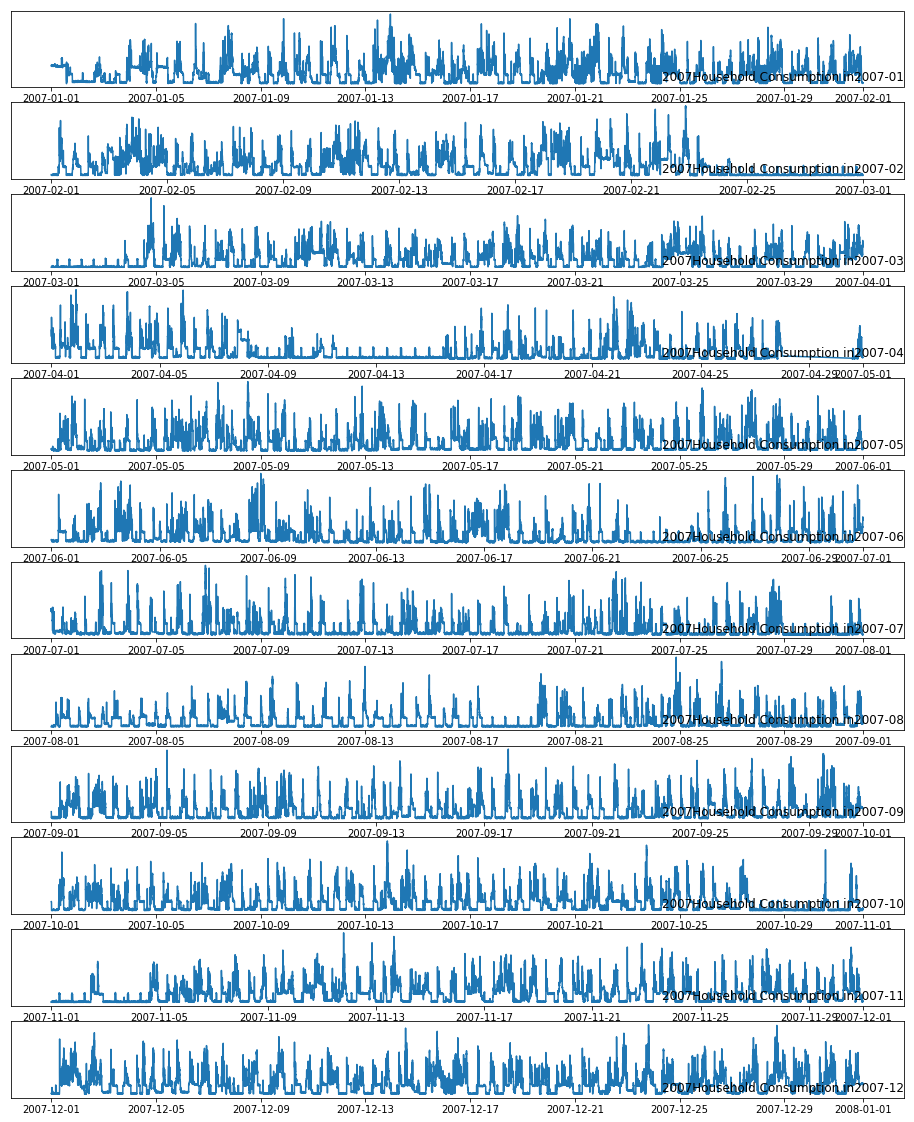

In [51]:
# creating a list of each month 1-12
months = ["%.2d" % x for x in range(1,13)]

ev.power_consumption_by_month(data=data, year='2007', months=months)
        
# displaying the visualisations
plt.show();

So, from these graphs we can interpret several things:
* Not only is there seasonality in household consumption, there are also daily patterns
    * i.e. we would tend to think that at night consumption may be lower than during the day because this is when people are asleep
* There are several periods where consumption is exceptionally low, but not null values, so this could possibly be due to holidays, where houses were unoccupied and thus not consuming any power

### *To further explore these interpretations, I will create plots that show daily consumption*

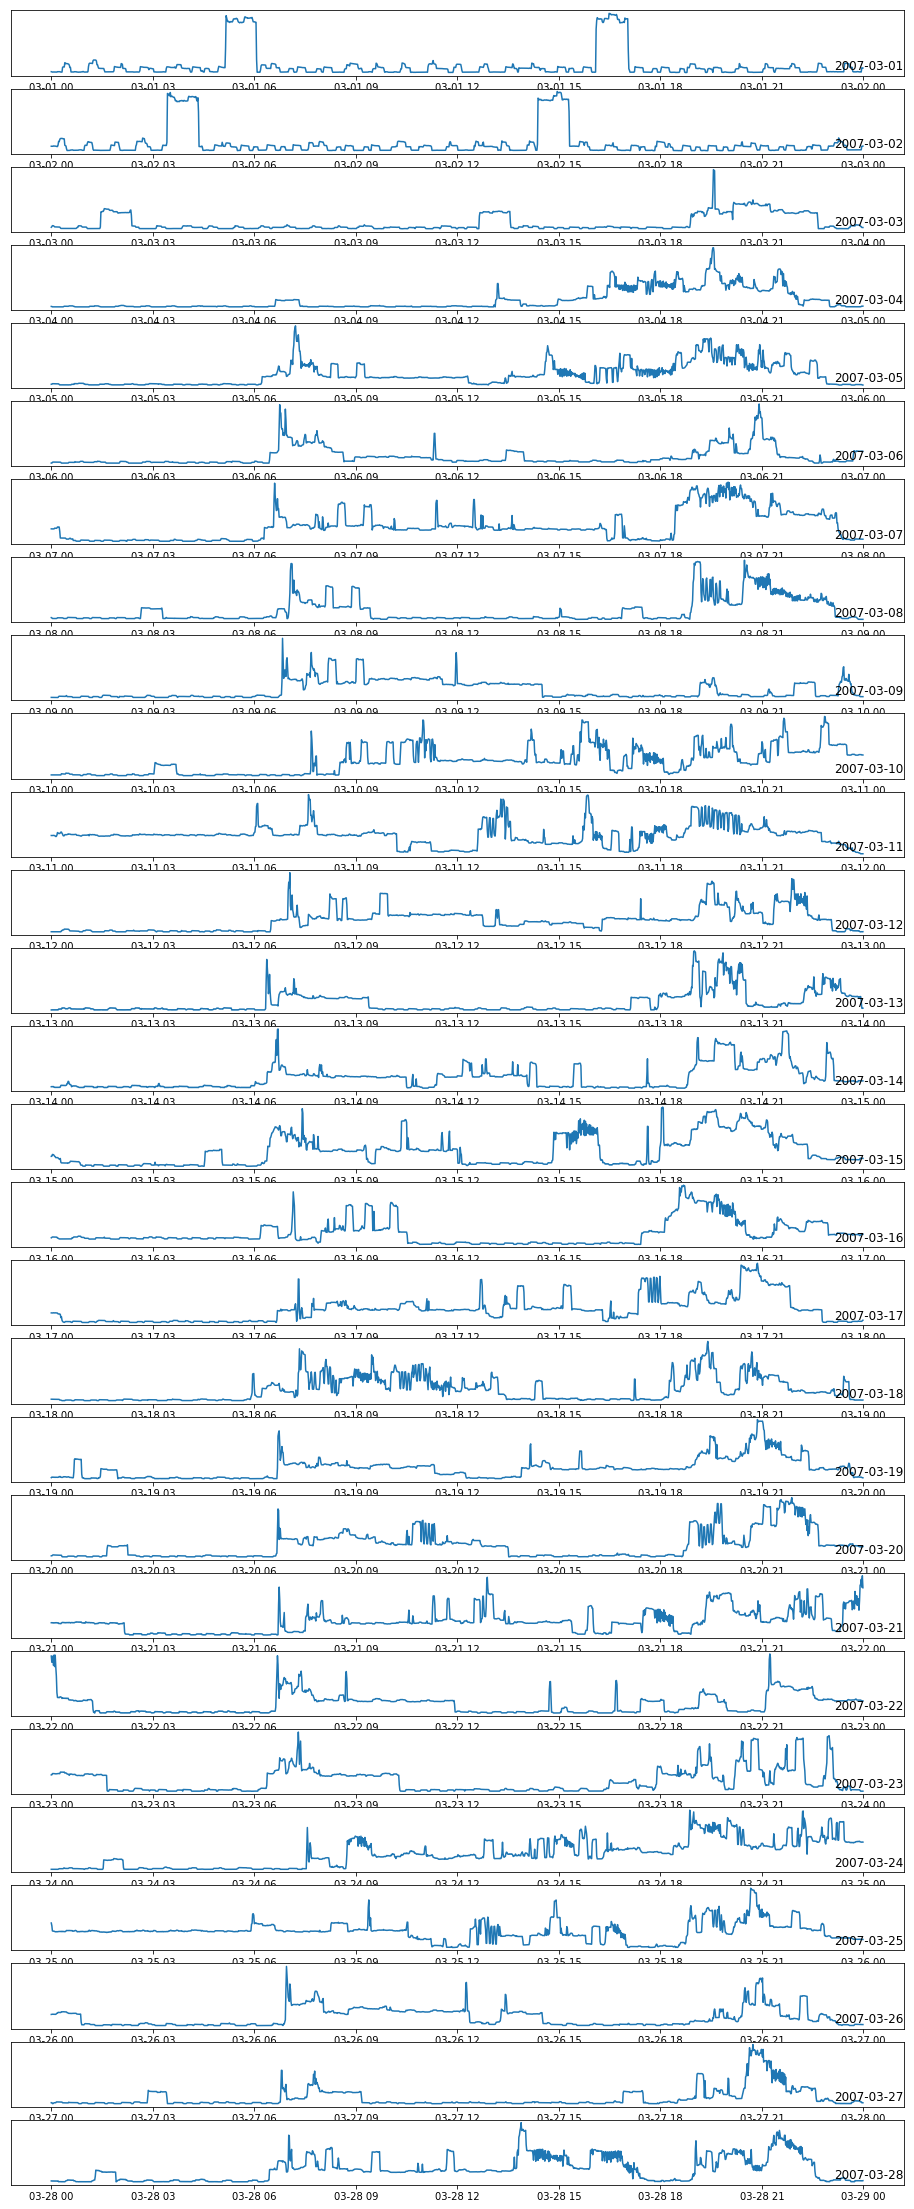

In [52]:
# creating a list of days
days = ["%.2d" % x for x in range(1,29)]

ev.day_plots(data=data, year='2007', month='03', days=days)
        
# displaying the visualisations
plt.show();

The interpretations we previously made, concerning daily patterns, is all but confirmed with these plots
* In the winter month, there seems to be strong overnight consumption on some days, and generally with consumption throughout the day
* In summer months, less overnight consumption, peaks in consumption throughout day starting with the morning. Would say that most of the heavy consumption takes place during the evenings

### Feature Engineering

A lot of the variables do not seem too useful, whereas the seasonal component seems to have very strong implications on household energy consumption. For this reason, I think it is necessary to create new columns, while dropping others


In [53]:
# using my own library I have created a function which performs the feature engineering
data = dc.feature_engineering(data)
display(data.head())

,datetime,global_active_power,voltage,year,quarter,month,day
0,2006-12-16 17:24:00,4.216,234.840,2006,4,12,16
1,2006-12-16 17:25:00,5.360,233.630,2006,4,12,16
2,2006-12-16 17:26:00,5.374,233.290,2006,4,12,16
3,2006-12-16 17:27:00,5.388,233.740,2006,4,12,16
4,2006-12-16 17:28:00,3.666,235.680,2006,4,12,16


### Using DarkSky API to retrieve weather data

In [ ]:
# # importing the class WeatherGetter that I made
# from library import WeatherGetter 

# # creating a list of datetimes
# list_of_datetimes = list(data.datetime.astype(str))
# temperature_list = []
# for i in list_of_datetimes:
#     temp = WG.current_temperature(i)
#     temperature_list.append(temp)

# temperature_list

In [54]:
# We used an API to retreive weather data, which may help us with predicting power consumption
temp = dc.read_weather_data('hourly_temperatures.csv')

# due to API cost, I retrieved weather day by the hour, then created repeat rows for an hour, so that one hour would have the same temperature
temp = dc.repeat_weather(temp)

# now merging the two datasets together
data = dc.merge_dataframes(data, temp)

display(data.head())

,datetime,global_active_power,voltage,year,quarter,month,day,temperature
0,2006-12-18 00:00:00,0.278,246.170,2006,4,12,18,3.92
1,2006-12-18 00:01:00,0.238,246.400,2006,4,12,18,3.92
2,2006-12-18 00:02:00,0.208,246.460,2006,4,12,18,3.92
3,2006-12-18 00:03:00,0.206,245.940,2006,4,12,18,3.92
4,2006-12-18 00:04:00,0.206,245.980,2006,4,12,18,3.92


In [55]:
# creating a weekday column as well
data = dc.weekday(data)

print(data.shape)
print(data.datetime.min())
print(data.datetime.max())
display(data.head())
print('The time series starts from: ', data.datetime.min())
print('The time series ends on: ', data.datetime.max())

(2027461, 9)
2006-12-18 00:00:00
2010-11-12 23:59:00


,datetime,global_active_power,voltage,year,quarter,month,day,temperature,weekday
0,2006-12-18 00:00:00,0.278,246.170,2006,4,12,18,3.92,1
1,2006-12-18 00:01:00,0.238,246.400,2006,4,12,18,3.92,1
2,2006-12-18 00:02:00,0.208,246.460,2006,4,12,18,3.92,1
3,2006-12-18 00:03:00,0.206,245.940,2006,4,12,18,3.92,1
4,2006-12-18 00:04:00,0.206,245.980,2006,4,12,18,3.92,1


The time series starts from:  2006-12-18 00:00:00
The time series ends on:  2010-11-12 23:59:00


### Box Plots of Weekly, Monthly, Quarterly and Yearly Global Active Power Consumption

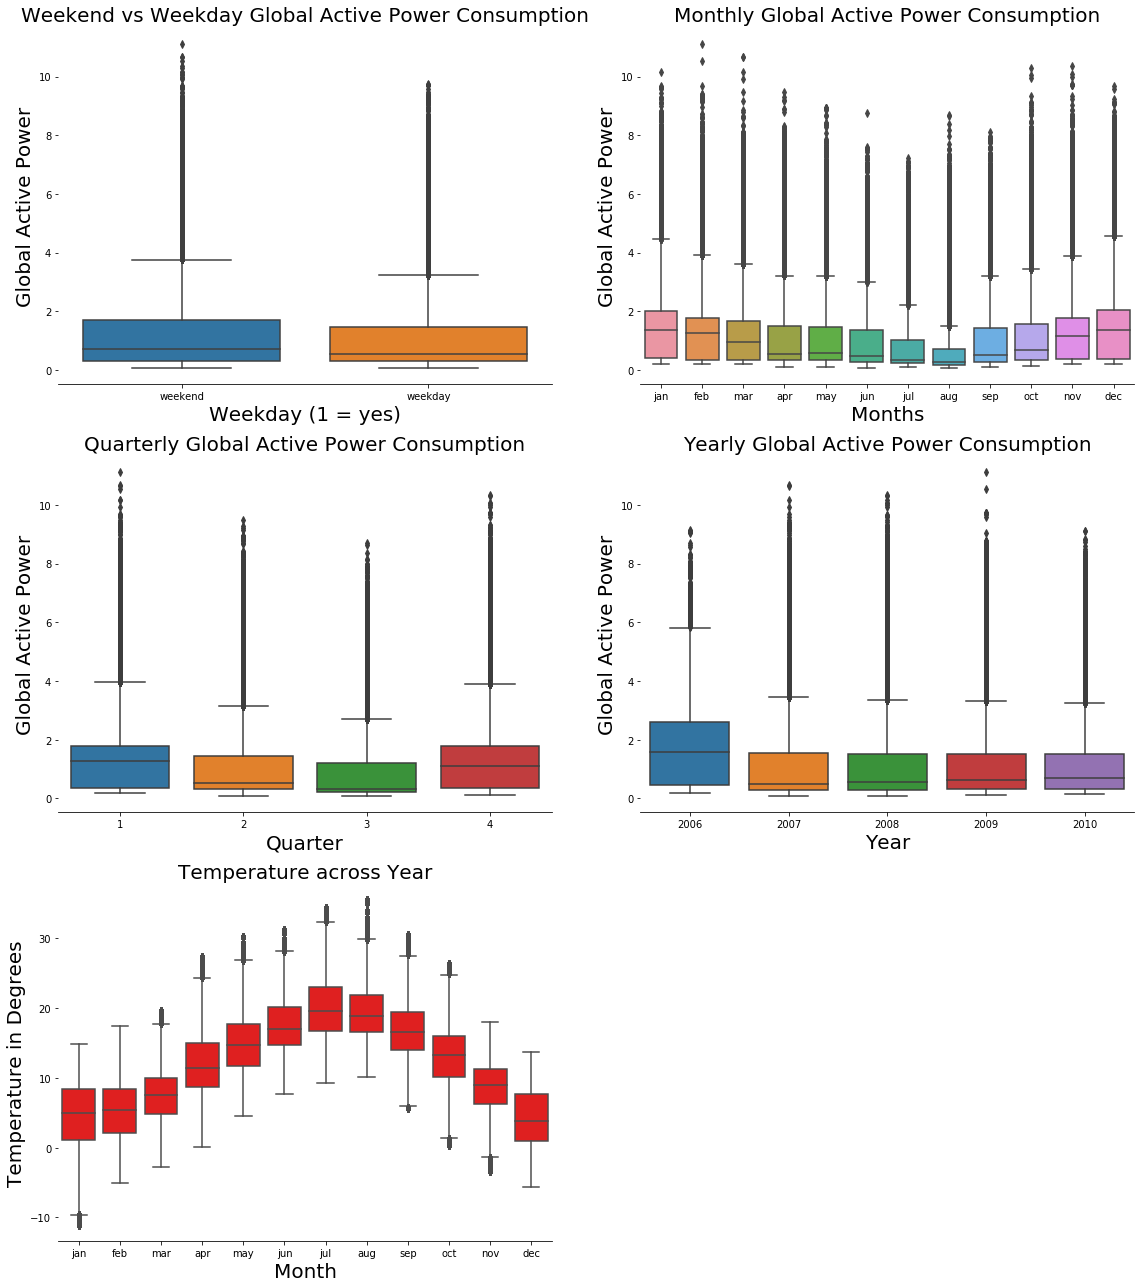

In [61]:
# creating box plots based on weekly, monthly quarterly and yearly global active power consumption
# also a look at how temperature varies during the year

ev.box_plots(data)

# displaying the visualisations
plt.show();

##### The boxplots above allow me to make several, now more clear interpretations of the dataset
* Power consumption on weekends is greater than on weekdays
    * Human behaviour can explain this: people work on weekdays/go to school so there is less power consumed during the day
    * However as people are more at home on the weekends, more power is consumed
* There is seasonal variation in power consumption
    * Colder, winter months see more power consumption 
    * Summer months see a lot less power consumption
    * Less/no energy is needed for heating in summer
    * Our temperatures show this
* Quarterly consumption boxplots confirm seasonality
* Yearly boxplot shows a fairly constant use of household energy over time, barring 2006
    * NB 2006 only includes December data, so naturally, consumption will be elevated

### Global Active Power by Years

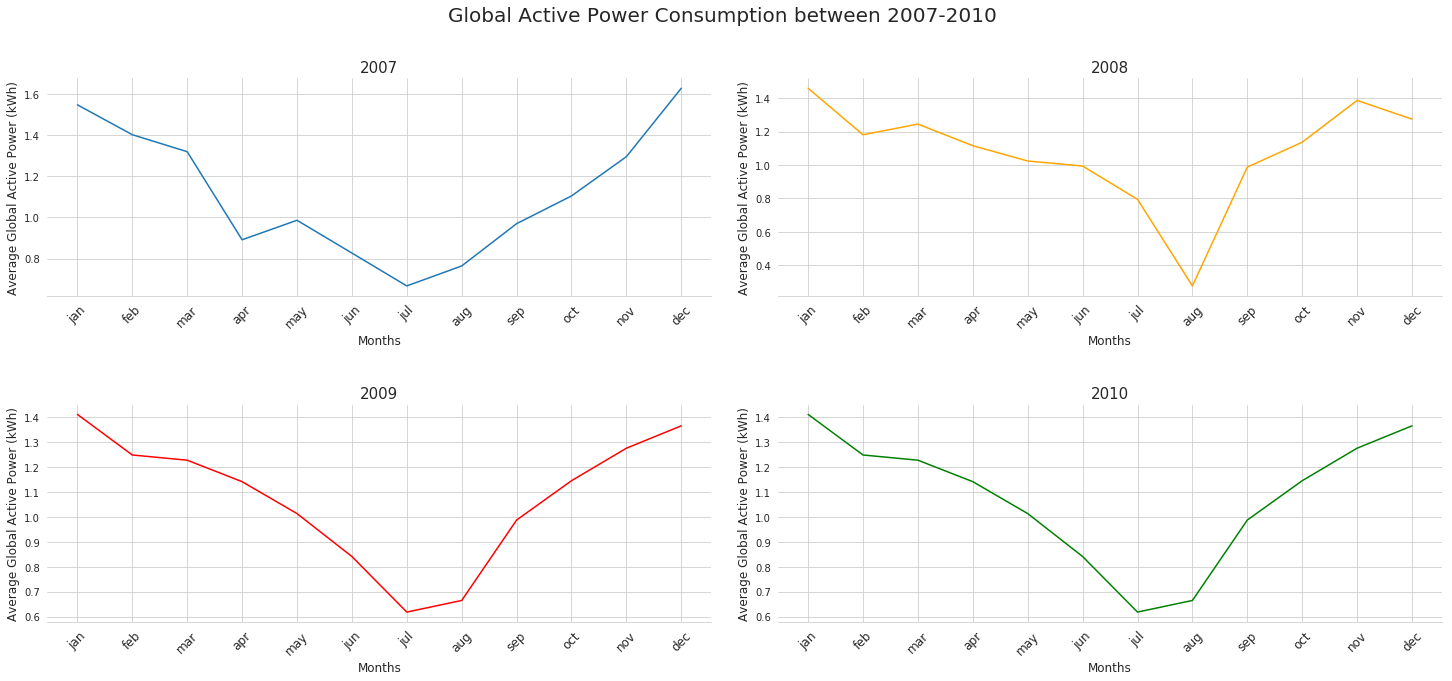

In [63]:
# looking at plots of yearly consumption
groupby = data.loc[data['year']!=2006].groupby(['year', 'month'], as_index=False)['global_active_power'].mean()
groupby_df = pd.DataFrame(groupby)

# using my function
ev.power_line_plots(groupby_df)

# displaying the visualisations
plt.show();

Clear cyclical nature in power consumption across years

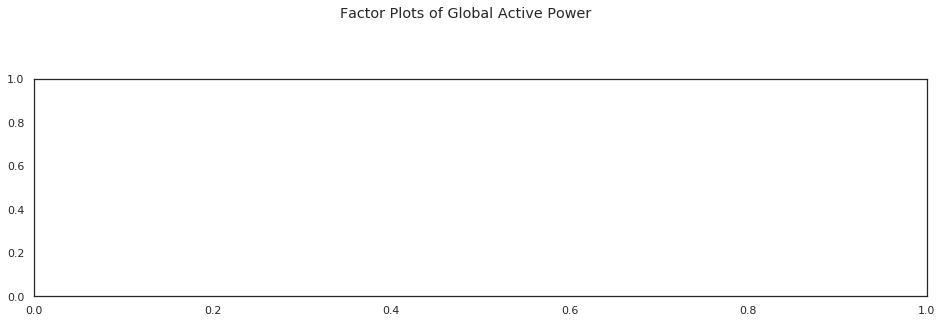

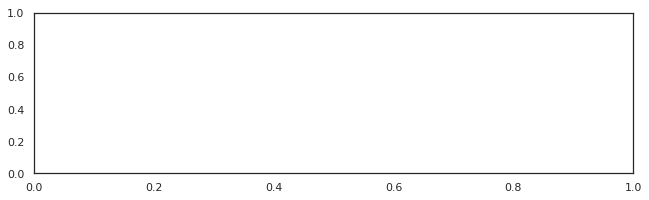

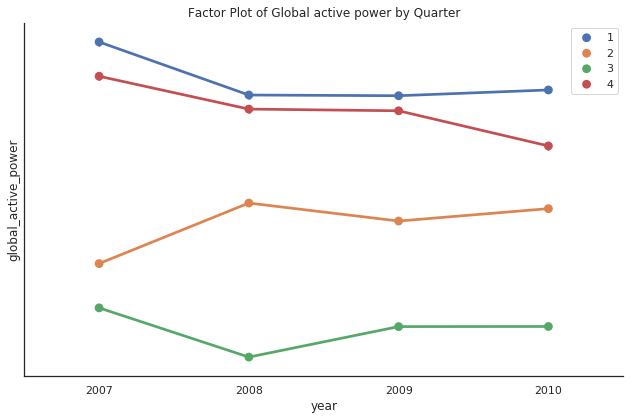

In [77]:
# creating factor plots comparing weekday consumption as well as quarterly consumption

ev.factor_plots(data)



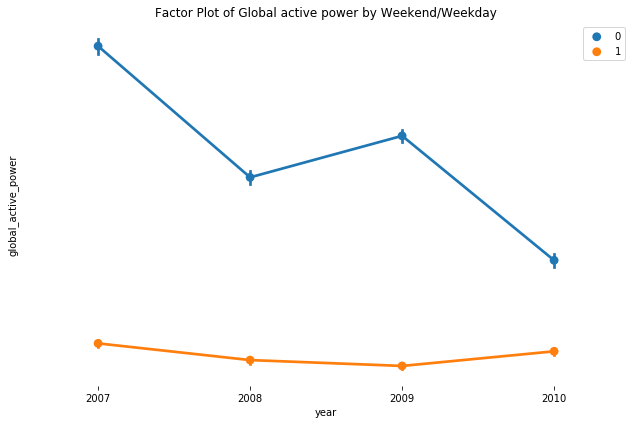

In [18]:
sns.factorplot('year','global_active_power',hue='weekday',
                    data=(data.loc[data['year'] != 2006]), size=6, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Global active power by Weekend/Weekday') 
plt.yticks([])
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

### Correlation Matrix PLot

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

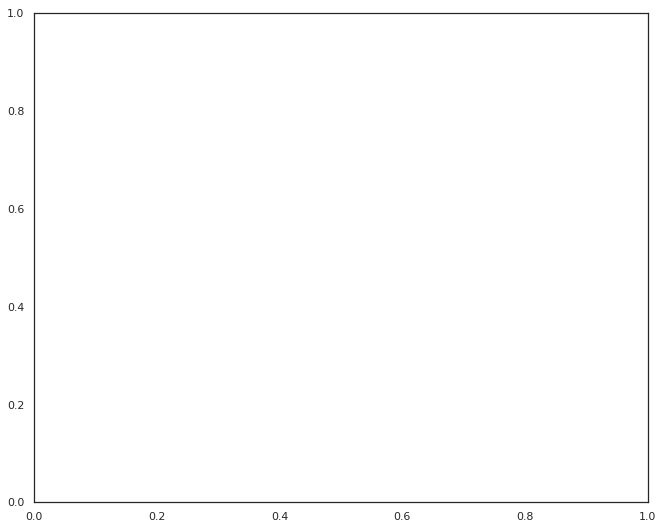

In [67]:
# creating a correlation matrix

ev.correlation_matrix_plot(data)

plt.show();

Correlation plot shows some negative correlation between global active power, and voltage/temperature

And again, a factor plot which shows the distinct difference in consumption between weekdays and weekends

In [8]:
# finally, saving the dataset to CSV for future use 
# data.to_csv('final_hourly.csv')
data.set_index('datetime', inplace=True)
data.index = pd.to_datetime(data.index)
data.head()

,global_active_power,voltage,year,quarter,month,day,temperature,weekday
datetime,,,,,,,,
2006-12-18 00:00:00,0.278,246.170,2006,4,12,18,3.92,1
2006-12-18 00:01:00,0.238,246.400,2006,4,12,18,3.92,1
2006-12-18 00:02:00,0.208,246.460,2006,4,12,18,3.92,1
2006-12-18 00:03:00,0.206,245.940,2006,4,12,18,3.92,1
2006-12-18 00:04:00,0.206,245.980,2006,4,12,18,3.92,1


In [68]:
# finally, saving the dataset to CSV for future use, as well as dropping 2006 as there are only 13 days there
dc.save_cleaned_df(data)

In [69]:
# saving an hourly csv for more analysis and naive modelling
dc.hourly_csv(data)